# Model Validation Notebook

The following notebook contains the code we used to perform our model validation. The includes evaluating our model performance on a held-out set of patients not seen by the model during training.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

#Model Validation - Day 28

The following cell will load in the pre-processed training and validation datasets as pandas dataframes. The column containing the final label (`'healed12'`) is removed from the input data and saved as a seperated dataframe.

In [ ]:
x_Tr_28 = pd.read_csv('/content/drive/MyDrive/wound care data/train_28_final.csv')
y_Tr_28 = x_Tr_28['healed12']
x_Tr_28 = x_Tr_28.drop(['healed12'], axis=1)

x_Val_28 = pd.read_csv('/content/drive/MyDrive/wound care data/val_28_final.csv')
y_Val_28 = x_Val_28['healed12']
x_Val_28 = x_Val_28.drop(['healed12'], axis=1)

x_Tr_28.head()

The next cell trains a logistic regression model to predict wound healing within 12 weeks, using data up to day 28 after a patient's initial visit to the clinic.

In [ ]:
# train logistic regression model
# increased maximum iteration to 1000 since did not converge at default number

log_reg_model_28 = LogisticRegression(max_iter=1000).fit(x_Tr_28, y_Tr_28)

We then examine model performance by calculating accuracy, precision, sensitivity, and specificty. ROC curves are also included later in this section.

In [ ]:
preds = log_reg_model_28.predict(x_Val_28)

In [ ]:
print("The accuracy is {}".format(accuracy_score(y_Val_28, preds)))
print("The precision is {}".format(precision_score(y_Val_28, preds)))
print("The recall/sensitivity is {}".format(recall_score(y_Val_28, preds)))

tn, fp, fn, tp = confusion_matrix(y_Val_28, preds).ravel()
specificity = tn / (tn+fp)
print("The specificity is {}".format(specificity))

The accuracy is 0.7636704896913434
The precision is 0.7646322442948613
The recall/sensitivity is 0.8846616541353384
The specificity is 0.574712927827151


Next, we train a Random Forest model on the same data. The hyperparameters were obtained via Grid Search, performed in the seperate `model_training` notebook.

In [ ]:
rf_model_28 = RandomForestClassifier(n_estimators = 100,
 min_samples_split = 5,
 min_samples_leaf = 8,
 max_features = 'sqrt',
 max_depth = 36,
 bootstrap = False)

In [ ]:
rf_model_28.fit(x_Tr_28, y_Tr_28)

We repeat the same calculations as above for the Logistic Regression model for the Random Forest model as well.

In [ ]:
preds = rf_model_28.predict(x_Val_28)

In [ ]:
print("The accuracy is {}".format(accuracy_score(y_Val_28, preds)))
print("The precision is {}".format(precision_score(y_Val_28, preds)))
print("The recall/sensitivity is {}".format(recall_score(y_Val_28, preds)))

tn, fp, fn, tp = confusion_matrix(y_Val_28, preds).ravel()
specificity = tn / (tn+fp)
print("The specificity is {}".format(specificity))

The accuracy is 0.8111052674750184
The precision is 0.8598558942233887
The recall/sensitivity is 0.8245429362880886
The specificity is 0.7901190314327033


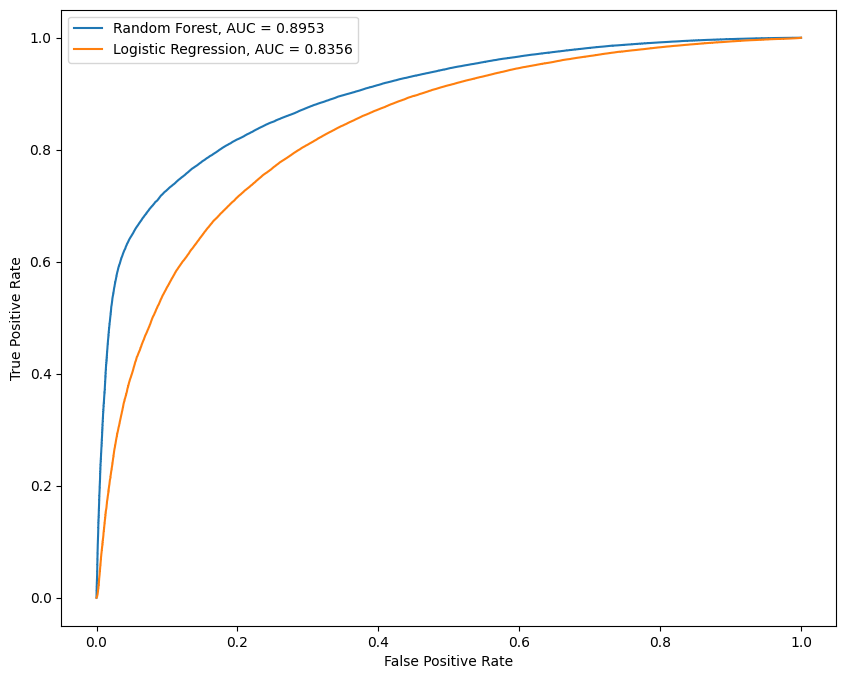

In [ ]:
#set up plotting area
plt.figure(0).clf()

plt.gcf().set_size_inches(10,8)

# add random forest model results
y_pred = rf_model_28.predict_proba(x_Val_28)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_Val_28, y_pred)
auc = round(metrics.roc_auc_score(y_Val_28, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC = "+str(auc))

# add logistic regression model results
y_pred = log_reg_model_28.predict_proba(x_Val_28)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_Val_28, y_pred)
auc = round(metrics.roc_auc_score(y_Val_28, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC = "+str(auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

#Model Validation - Day 21

This section includes the validation details for training models to predicit a wound healing within 12 weeks, using data from the first 21 days after a patient's initial visit. For a more detailed description of each of the cells, please refer to the previous section ('Model Validation - Day 28') as the procedure is the same for each timepoint.

In [ ]:
# load data
x_Tr_21 = pd.read_csv('/content/drive/MyDrive/wound care data/train_21_final.csv')
y_Tr_21 = x_Tr_21['healed12']
x_Tr_21 = x_Tr_21.drop(['healed12'], axis=1)

x_Val_21 = pd.read_csv('/content/drive/MyDrive/wound care data/val_21_final.csv')
y_Val_21 = x_Val_21['healed12']
x_Val_21 = x_Val_21.drop(['healed12'], axis=1)

In [ ]:
# train logistic regression model
# increased maximum iteration to 1000 since did not converge at default number

log_reg_model_21 = LogisticRegression(max_iter=1000).fit(x_Tr_21, y_Tr_21)

In [ ]:
preds = log_reg_model_21.predict(x_Val_21)

In [ ]:
print("The accuracy is {}".format(accuracy_score(y_Val_21, preds)))
print("The precision is {}".format(precision_score(y_Val_21, preds)))
print("The recall/sensitivity is {}".format(recall_score(y_Val_21, preds)))

tn, fp, fn, tp = confusion_matrix(y_Val_21, preds).ravel()
specificity = tn / (tn+fp)
print("The specificity is {}".format(specificity))

The accuracy is 0.7494420554134233
The precision is 0.7506948132107611
The recall/sensitivity is 0.882572809236557
The specificity is 0.5409232332211569


In [ ]:
rf_model_21 = RandomForestClassifier(n_estimators = 200,
 min_samples_split = 2,
 min_samples_leaf = 8,
 max_features = 'sqrt',
 max_depth = 53,
 bootstrap = True)

In [ ]:
rf_model_21.fit(x_Tr_21, y_Tr_21)

In [ ]:
preds = rf_model_21.predict(x_Val_21)

In [ ]:
print("The accuracy is {}".format(accuracy_score(y_Val_21, preds)))
print("The precision is {}".format(precision_score(y_Val_21, preds)))
print("The recall/sensitivity is {}".format(recall_score(y_Val_21, preds)))

tn, fp, fn, tp = confusion_matrix(y_Val_21, preds).ravel()
specificity = tn / (tn+fp)
print("The specificity is {}".format(specificity))

The accuracy is 0.7870705311236583
The precision is 0.825728261663138
The recall/sensitivity is 0.8253064798598949
The specificity is 0.7271826782652867


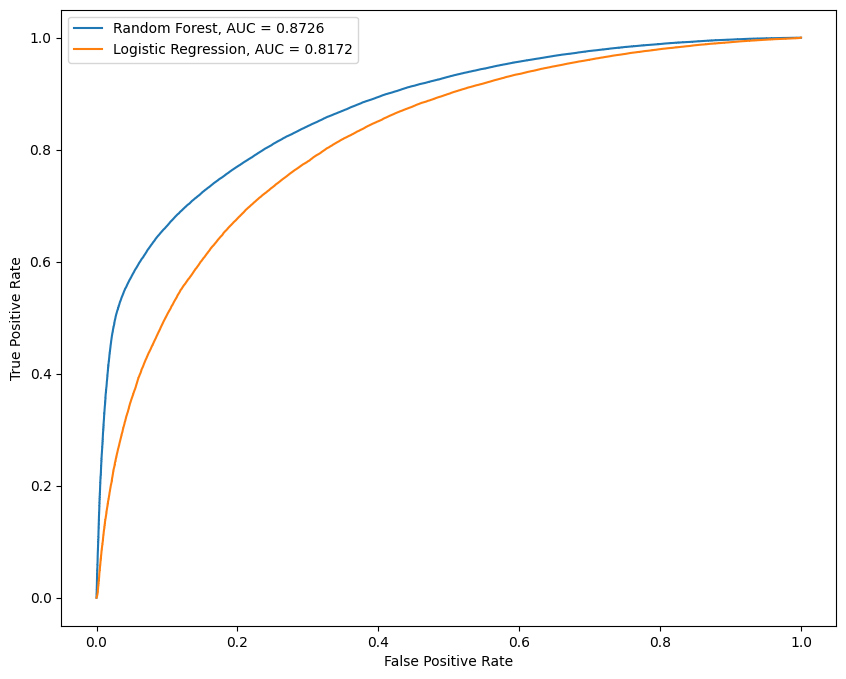

In [ ]:
#set up plotting area
plt.figure(0).clf()

plt.gcf().set_size_inches(10,8)

# add random forest model results
y_pred = rf_model_21.predict_proba(x_Val_21)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_Val_21, y_pred)
auc = round(metrics.roc_auc_score(y_Val_21, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC = "+str(auc))

# add logistic regression model results
y_pred = log_reg_model_21.predict_proba(x_Val_21)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_Val_21, y_pred)
auc = round(metrics.roc_auc_score(y_Val_21, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC = "+str(auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()


#Model Validation - Day 14

This section includes the validation details for training models to predicit a wound healing within 12 weeks, using data from the first 14 days after a patient's initial visit. For a more detailed description of each of the cells, please refer to the first section ('Model Validation - Day 28') as the procedure is the same for each timepoint.

In [ ]:
# load data
x_Tr_14 = pd.read_csv('/content/drive/MyDrive/wound care data/train_14_final.csv')
y_Tr_14 = x_Tr_14['healed12']
x_Tr_14 = x_Tr_14.drop(['healed12'], axis=1)

x_Val_14 = pd.read_csv('/content/drive/MyDrive/wound care data/val_14_final.csv')
y_Val_14 = x_Val_14['healed12']
x_Val_14 = x_Val_14.drop(['healed12'], axis=1)

In [ ]:
# train logistic regression model
# increased maximum iteration to 1000 since did not converge at default number

log_reg_model_14 = LogisticRegression(max_iter=1000).fit(x_Tr_14, y_Tr_14)

In [ ]:
preds = log_reg_model_14.predict(x_Val_14)

In [ ]:
print("The accuracy is {}".format(accuracy_score(y_Val_14, preds)))
print("The precision is {}".format(precision_score(y_Val_14, preds)))
print("The recall/sensitivity is {}".format(recall_score(y_Val_14, preds)))

tn, fp, fn, tp = confusion_matrix(y_Val_14, preds).ravel()
specificity = tn / (tn+fp)
print("The specificity is {}".format(specificity))

In [ ]:
rf_model_14 = RandomForestClassifier(n_estimators = 100,
 min_samples_split = 5,
 min_samples_leaf = 8,
 max_features = 'sqrt',
 max_depth = 36,
 bootstrap = False)

In [ ]:
rf_model_14.fit(x_Tr_14, y_Tr_14)

In [ ]:
preds = rf_model_14.predict(x_Val_14)

In [ ]:
print("The accuracy is {}".format(accuracy_score(y_Val_14, preds)))
print("The precision is {}".format(precision_score(y_Val_14, preds)))
print("The recall/sensitivity is {}".format(recall_score(y_Val_14, preds)))

tn, fp, fn, tp = confusion_matrix(y_Val_14, preds).ravel()
specificity = tn / (tn+fp)
print("The specificity is {}".format(specificity))

In [ ]:
#set up plotting area
plt.figure(0).clf()

plt.gcf().set_size_inches(10,8)

# add random forest model results
y_pred = rf_model_14.predict_proba(x_Val_14)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_Val_14, y_pred)
auc = round(metrics.roc_auc_score(y_Val_14, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC = "+str(auc))

# add logistic regression model results
y_pred = log_reg_model_14.predict_proba(x_Val_14)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_Val_14, y_pred)
auc = round(metrics.roc_auc_score(y_Val_14, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC = "+str(auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

#Model Validation - Day 35

This section includes the validation details for training models to predicit a wound healing within 12 weeks, using data from the first 14 days after a patient's initial visit. For a more detailed description of each of the cells, please refer to the first section ('Model Validation - Day 28') as the procedure is the same for each timepoint.

In [ ]:
# load data
x_Tr_35 = pd.read_csv('/content/drive/MyDrive/wound care data/train_35_final.csv')
y_Tr_35 = x_Tr_35['healed12']
x_Tr_35 = x_Tr_35.drop(['healed12'], axis=1)

x_Val_35 = pd.read_csv('/content/drive/MyDrive/wound care data/val_35_final.csv')
y_Val_35 = x_Val_35['healed12']
x_Val_35 = x_Val_35.drop(['healed12'], axis=1)

In [ ]:
# train logistic regression model
# increased maximum iteration to 1000 since did not converge at default number

log_reg_model_35 = LogisticRegression(max_iter=1000).fit(x_Tr_35, y_Tr_35)

In [ ]:
preds = log_reg_model_35.predict(x_Val_35)

In [ ]:
print("The accuracy is {}".format(accuracy_score(y_Val_35, preds)))
print("The precision is {}".format(precision_score(y_Val_35, preds)))
print("The recall/sensitivity is {}".format(recall_score(y_Val_35, preds)))

tn, fp, fn, tp = confusion_matrix(y_Val_35, preds).ravel()
specificity = tn / (tn+fp)
print("The specificity is {}".format(specificity))

The accuracy is 0.7699649089303192
The precision is 0.7694678292242935
The recall/sensitivity is 0.8863063942322829
The specificity is 0.5905852942247248


The following cells set up a Grid Search for Random Forest hyperparameters. We perform 3-fold cross validation on 20 different random combinations of hyperparameters of this grid to select the set of best-performing hyperparameters for our model.

In [ ]:
# create hyperparameter search grid

# Number of trees in random forest
n_estimators = [10, 20, 50, 75, 100, 200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 70, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 30 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_Tr_35, y_Tr_35)

In [ ]:
rf_model = rf_random.best_estimator_

In [ ]:
rf_random.best_params_

The following cell contains the hyperparameters selected during our search.

In [ ]:
rf_model_35 = RandomForestClassifier(n_estimators = 100,
 min_samples_split = 5,
 min_samples_leaf = 8,
 max_features = 'sqrt',
 max_depth = 36,
 bootstrap = False)

In [ ]:
rf_model_35.fit(x_Tr_35, y_Tr_35)

In [ ]:
preds = rf_model_35.predict(x_Val_35)

In [ ]:
print("The accuracy is {}".format(accuracy_score(y_Val_35, preds)))
print("The precision is {}".format(precision_score(y_Val_35, preds)))
print("The recall/sensitivity is {}".format(recall_score(y_Val_35, preds)))

tn, fp, fn, tp = confusion_matrix(y_Val_35, preds).ravel()
specificity = tn / (tn+fp)
print("The specificity is {}".format(specificity))

The accuracy is 0.8314721539232771
The precision is 0.8831054956617592
The recall/sensitivity is 0.8323442370053207
The specificity is 0.8301275439001007


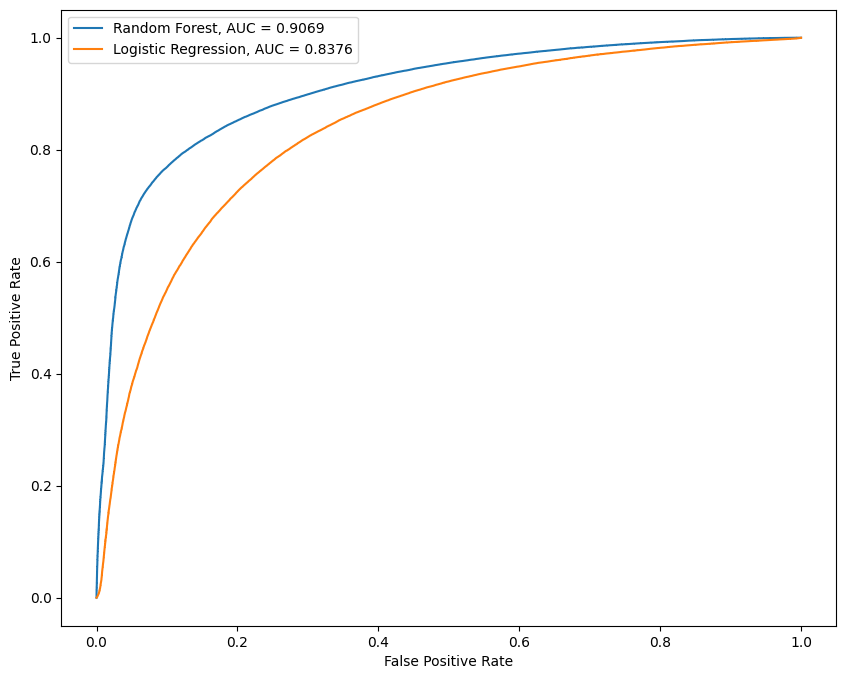

In [ ]:
#set up plotting area
plt.figure(0).clf()

plt.gcf().set_size_inches(10,8)

# add random forest model results
y_pred = rf_model_35.predict_proba(x_Val_35)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_Val_35, y_pred)
auc = round(metrics.roc_auc_score(y_Val_35, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC = "+str(auc))

# add logistic regression model results
y_pred = log_reg_model_35.predict_proba(x_Val_35)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_Val_35, y_pred)
auc = round(metrics.roc_auc_score(y_Val_35, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC = "+str(auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()

plt.savefig('/content/drive/MyDrive/wound care data/ROC_day35_only_changes_val.png', bbox_inches='tight', dpi=600, facecolor='white')

Finally, we obtain the feature importances for our Random Forest model. We plot these values as a bar graph.

In [ ]:
# calculate feature importances

importances = rf_model_35.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_35.estimators_], axis=0)
forest_importances = pd.Series(importances, index=x_Tr_35.columns)
forest_importances = forest_importances.sort_values(ascending=False)

forest_importances

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.barh(forest_importances.index, forest_importances[forest_importances.index].values)

plt.gcf().set_size_inches(9,20)

plt.title("Parameter Importances")
plt.xlabel("Mean decrease in impurity")

#Model Validation - Baseline

This section includes the validation details for training models to predicit a wound healing within 12 weeks, using data from the first 14 days after a patient's initial visit. For a more detailed description of each of the cells, please refer to the first section ('Model Validation - Day 28') as the procedure is the same for each timepoint.

In [ ]:
# load data
x_Tr_0 = pd.read_csv('/content/drive/MyDrive/wound care data/train_35_final.csv')
y_Tr_0 = x_Tr_0['healed12']
x_Tr_0 = x_Tr_0.drop(['healed12'], axis=1)

x_Val_0 = pd.read_csv('/content/drive/MyDrive/wound care data/val_35_final.csv')
y_Val_0 = x_Val_0['healed12']
x_Val_0 = x_Val_0.drop(['healed12'], axis=1)

After reading in the full dataset of patient visits (up until day 35), we drop all columns that contain information past a patient's initial visit to the wound care clinic.

In [ ]:
# drop all columns past baseline

to_keep = set(x_Tr_0.columns)

for key in x_Tr_0.columns:
  for i in range(1, 6):
    if '_' + str(i * 7) in key or '_D' in key:
      to_keep.discard(key)

x_Tr_0 = x_Tr_0[list(to_keep)]
x_Val_0 = x_Val_0[list(to_keep)]
x_Tr_0.head()

In [ ]:
log_reg_model_0 = LogisticRegression(max_iter=1000).fit(x_Tr_0, y_Tr_0)

In [ ]:
preds = log_reg_model_0.predict(x_Val_0)

In [ ]:
print("The accuracy is {}".format(accuracy_score(y_Val_0, preds)))
print("The precision is {}".format(precision_score(y_Val_0, preds)))
print("The recall/sensitivity is {}".format(recall_score(y_Val_0, preds)))

tn, fp, fn, tp = confusion_matrix(y_Val_0, preds).ravel()
specificity = tn / (tn+fp)
print("The specificity is {}".format(specificity))

In [ ]:
rf_model_0 = RandomForestClassifier(n_estimators = 75,
 min_samples_split = 10,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 19,
 bootstrap = False)

In [ ]:
rf_model_0.fit(x_Tr_0, y_Tr_0)

In [ ]:
preds = rf_model_0.predict(x_Val_0)

In [ ]:
print("The accuracy is {}".format(accuracy_score(y_Val_0, preds)))
print("The precision is {}".format(precision_score(y_Val_0, preds)))
print("The recall/sensitivity is {}".format(recall_score(y_Val_0, preds)))

tn, fp, fn, tp = confusion_matrix(y_Val_0, preds).ravel()
specificity = tn / (tn+fp)
print("The specificity is {}".format(specificity))

In [ ]:
#set up plotting area
plt.figure(0).clf()

plt.gcf().set_size_inches(10,8)

# add random forest model results
y_pred = rf_model_0.predict_proba(x_Val_0)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_Val_0, y_pred)
auc = round(metrics.roc_auc_score(y_Val_0, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC = "+str(auc))

# add logistic regression model results
y_pred = log_reg_model_0.predict_proba(x_Val_0)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_Val_0, y_pred)
auc = round(metrics.roc_auc_score(y_Val_0, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC = "+str(auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()